**IMPORTING LIBRARIES AND FRAMEWORK**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
plt.style.use('ggplot')

**READ THE EXCEL FILE**

In [ ]:
df = pd.read_csv('Agrofood_co2_emission.csv')
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [ ]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

**DATA PREPROCESSING**

In [ ]:
# Summary of missing values in each column
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [ ]:
# Drop missing values from DataFrame
df.dropna(inplace=True)

In [ ]:
df.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

**EDA (EXPLORATORY DATA ANALYSIS)**

In [ ]:
print(df.describe())

              Year  Savanna fires  Forest fires  Crop Residues  \
count  4546.000000    4546.000000   4546.000000    4546.000000   
mean   2005.298724    1578.318742   1154.424220    1202.174505   
std       8.859797    6188.105460   3788.977297    4069.987071   
min    1990.000000       0.000000      0.000000       0.004500   
25%    1998.000000       0.334500      0.048400      23.357000   
50%    2005.000000      11.354550      7.592600     132.518200   
75%    2013.000000     329.383700    222.426075     513.156025   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       4546.000000                  4546.000000   
mean        5601.932066                  5274.474704   
std        21612.516836                 19388.814454   
min            0.000000                     0.000000   
25%           90.361875                     0.000000   
50%          268.512150                   149.762750   
75%         1

In [ ]:
# Understanding the % of agri-food CO2 emission related to total emission
year_2020 = df.loc[df['Year'] == 2020] # only data from 2020
total_emission_kt_2020 = year_2020["total_emission"].sum() # total amount of CO2 from agrifood in 2020
total_emission_gt_2020 = round(total_emission_kt_2020 / 1_000_000,2) # total amount of CO2 from agrifood in 2020 in gigatones
perc = total_emission_gt_2020 / 30 # % of total emissions
print(f"The amount of CO2 from agrifood in 2020 is {total_emission_gt_2020} gigatones (gt), that is:", round(perc * 100), "%", "of total emissions!")

The amount of CO2 from agrifood in 2020 is 16.63 gigatones (gt), that is: 55 % of total emissions!


**Visualizing CO2 Emissions**

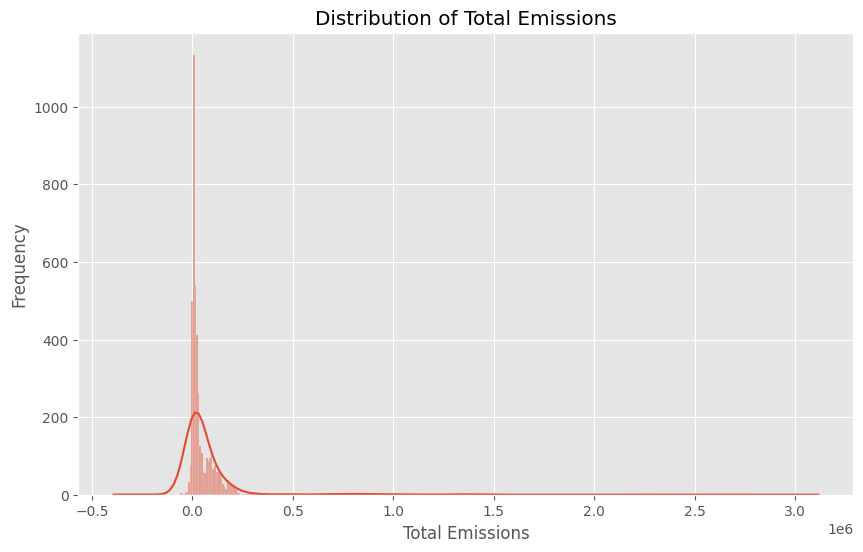

In [ ]:
# Visualize the distribution of total_emission
plt.figure(figsize=(10, 6))
sns.histplot(df['total_emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.show()

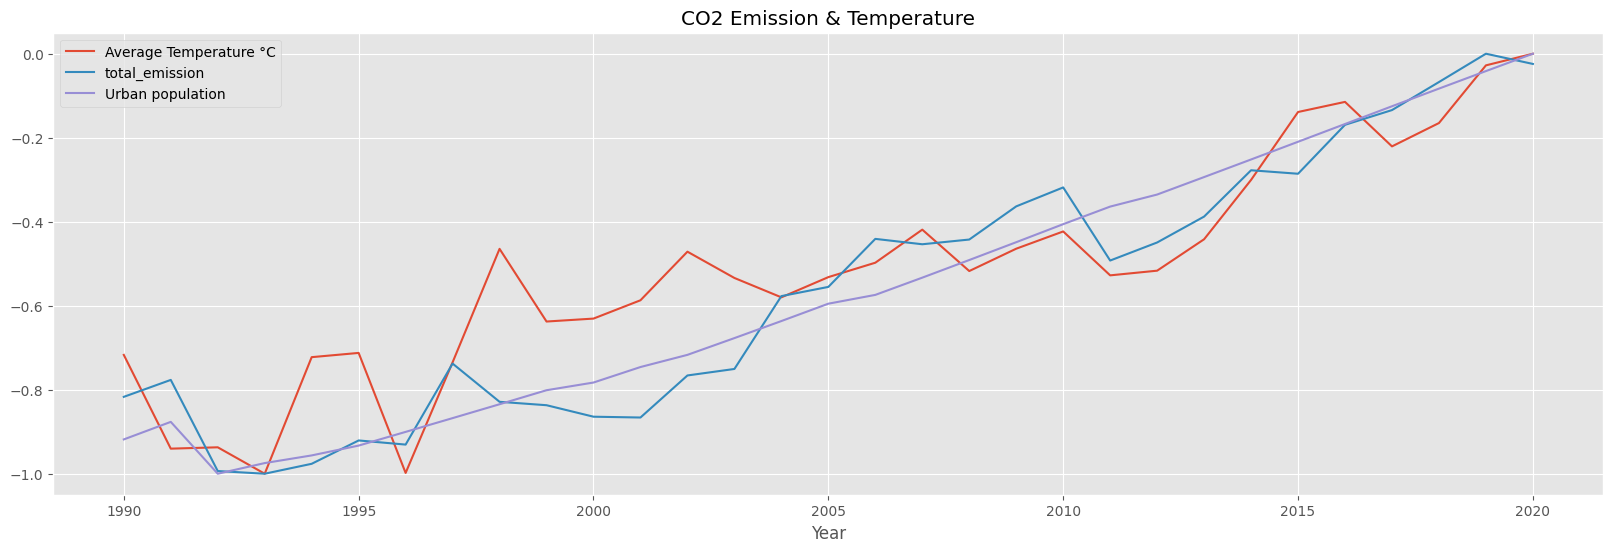

In [ ]:
# Multi Line Chart of CO2 Emission & Temperature
def normalizer(df):
    norm = (df - df.max()) / (df.max() - df.min())
    return norm

# temp_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean"})
temp_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean", "Urban population": "mean"})
norm_temp = normalizer(temp_emission)


norm_temp.plot(figsize=(20, 6))
plt.title("CO2 Emission & Temperature")
plt.show()

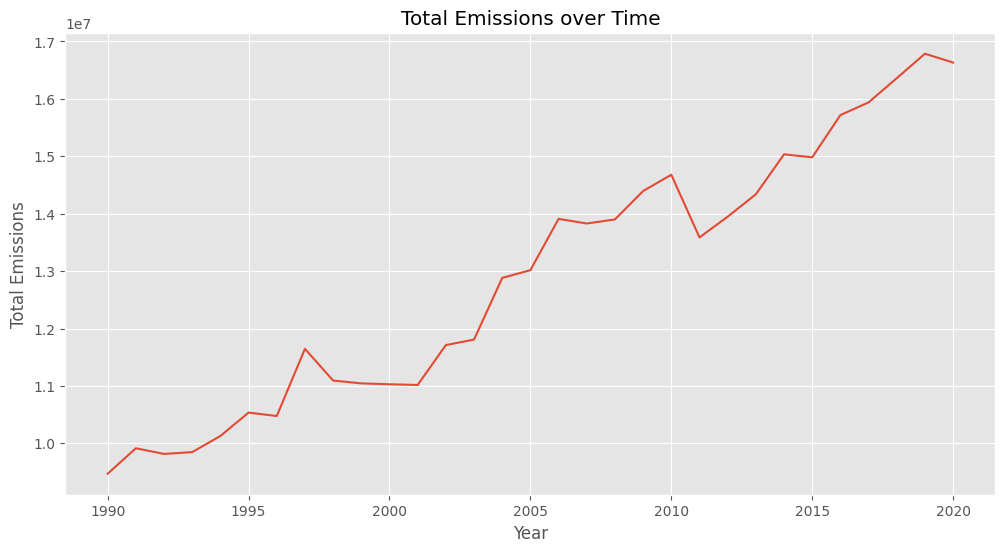

In [ ]:
df.groupby('Year')['total_emission'].sum().plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions over Time')
plt.show()

In [ ]:
# Visualizing CO2 Emissions and Identifying Trends and Patterns
# Categorizing features into groups for visualization
emission_sources = [
    'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion',
    'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
    'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing',
    'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management',
    'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use'
]

population_features = ['Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female']

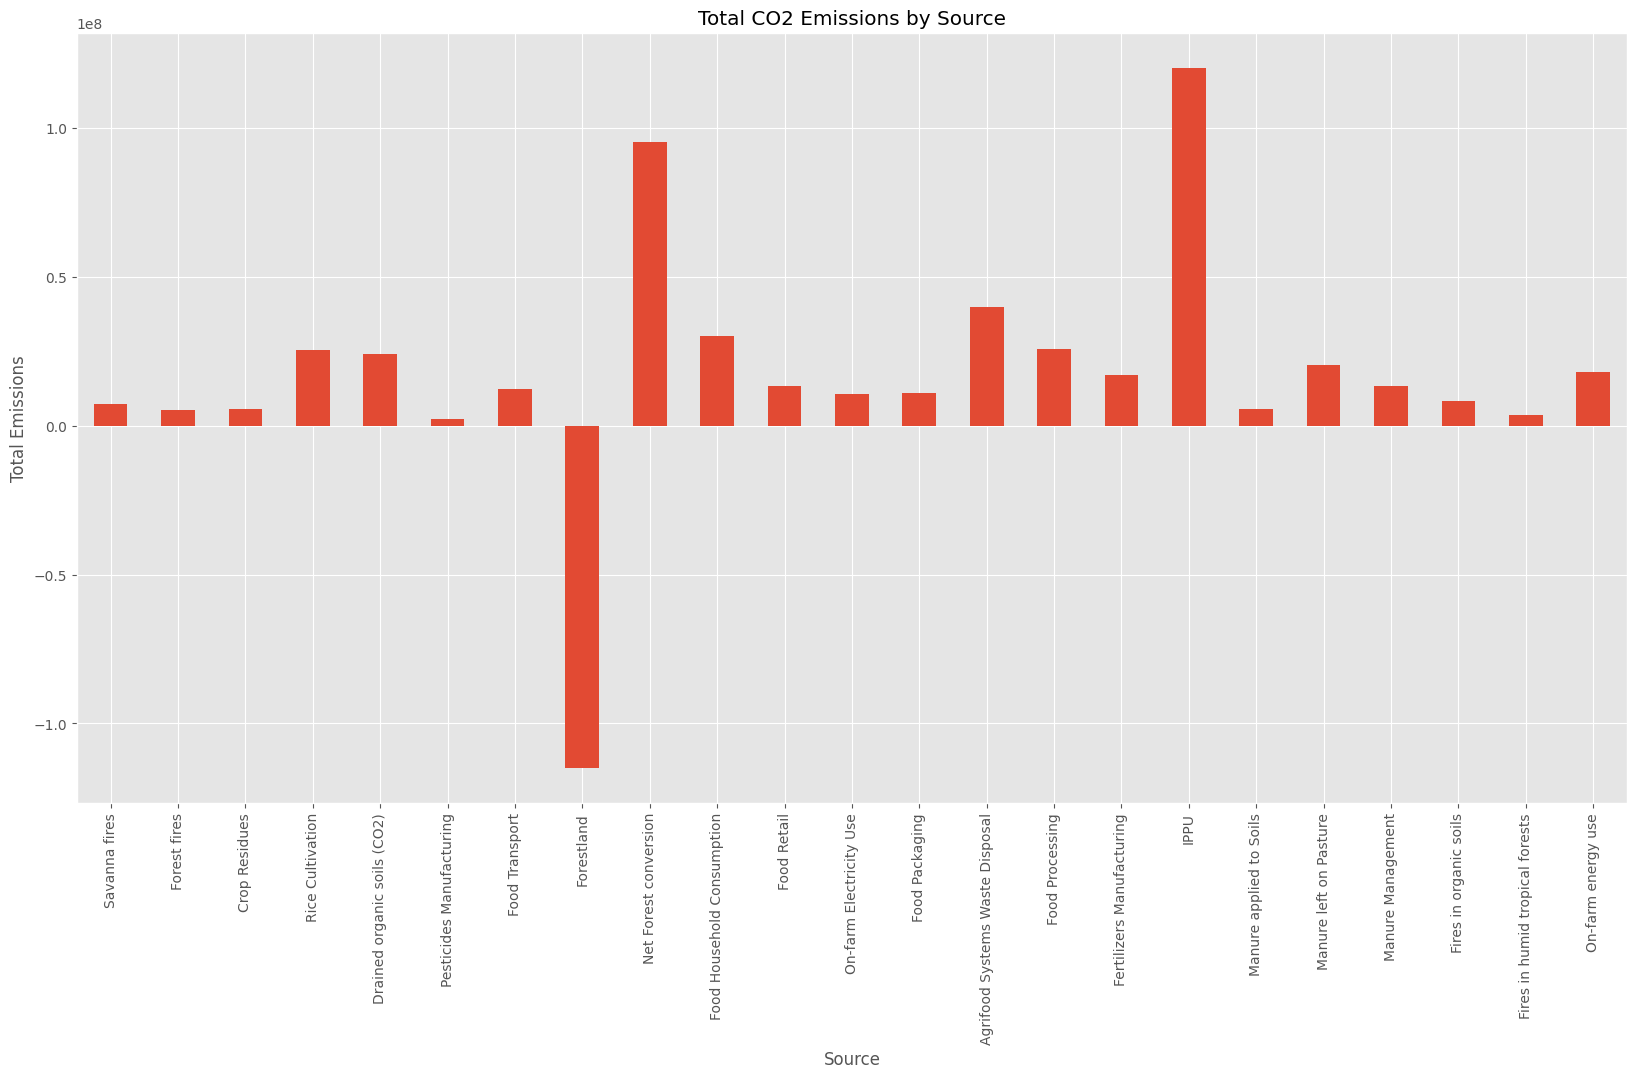

In [ ]:
# Emission sources visualized
plt.figure(figsize=(20, 10))
df[emission_sources].sum().plot(kind='bar')
plt.title('Total CO2 Emissions by Source')
plt.xlabel('Source')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.show()

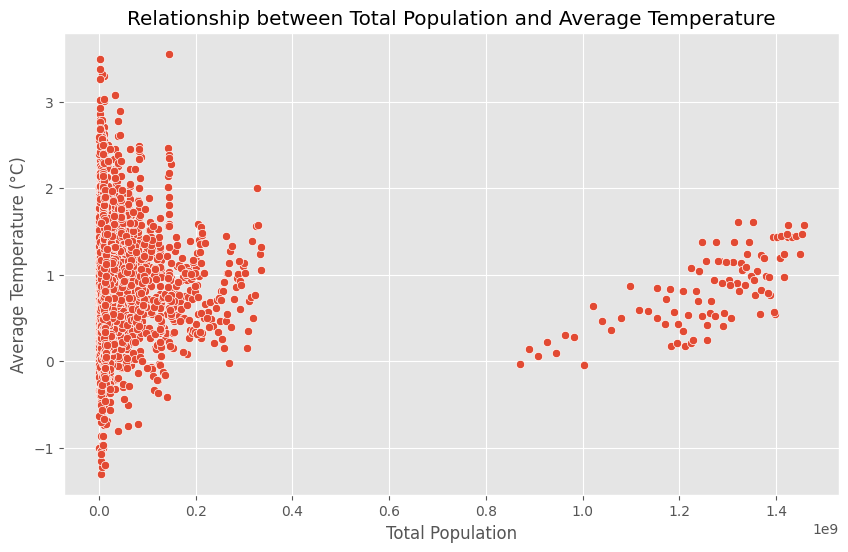

In [ ]:
# Average Temperature °C
# Calculate the total population
df["Total_Population"] = df["Total Population - Male"] + df["Total Population - Female"]

# Visualize the relationship between total population and average temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Population', y='Average Temperature °C', data=df)
plt.title('Relationship between Total Population and Average Temperature')
plt.xlabel('Total Population')
plt.ylabel('Average Temperature (°C)')
plt.show()

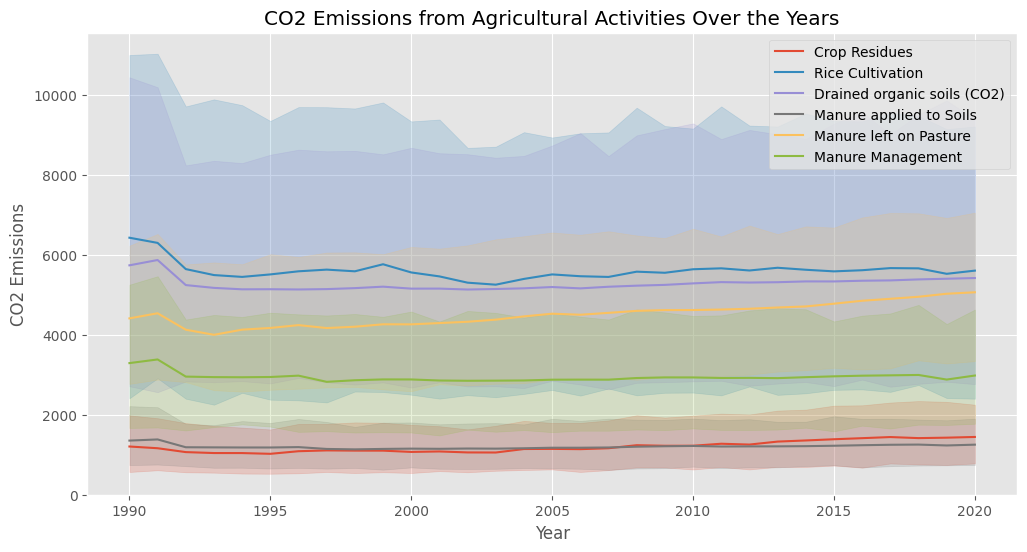

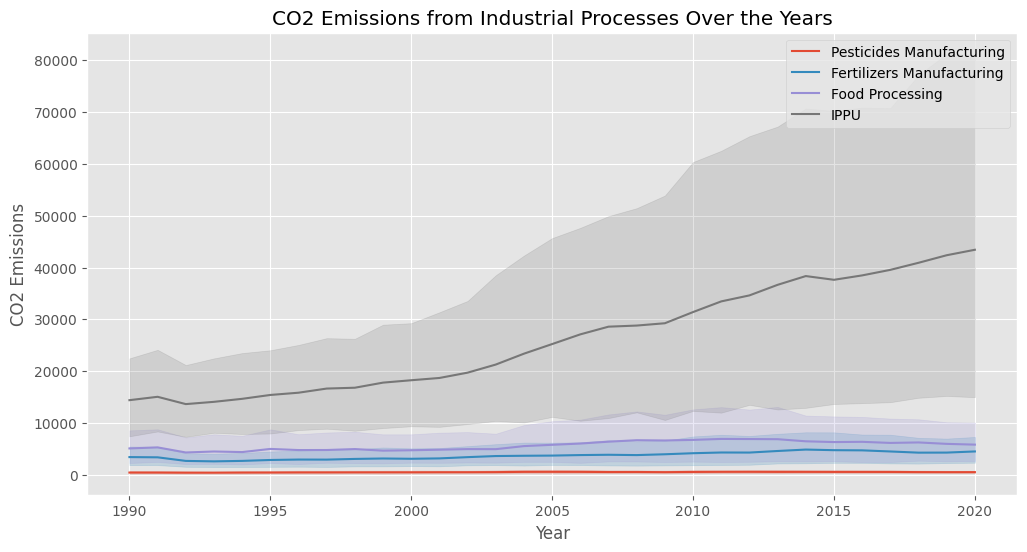

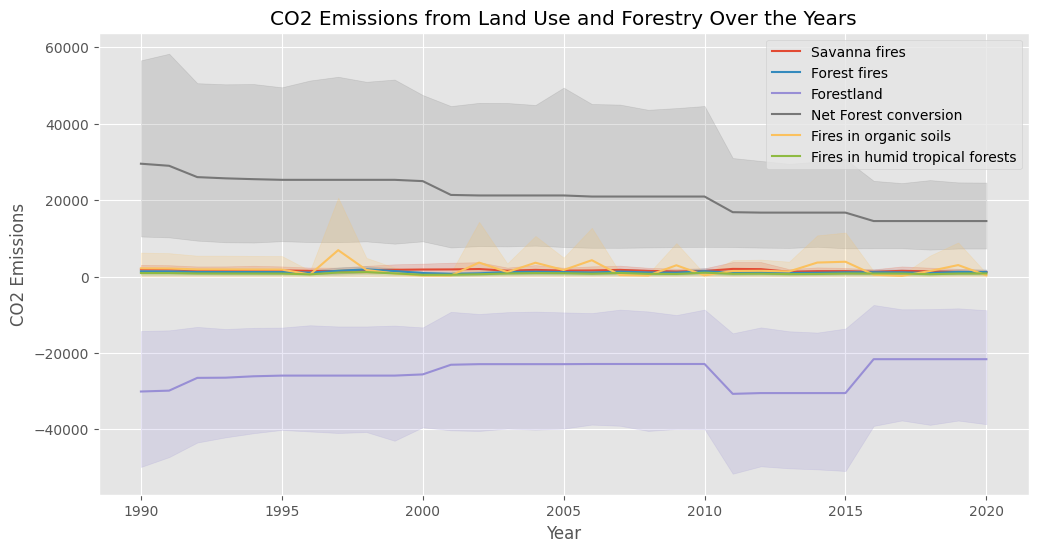

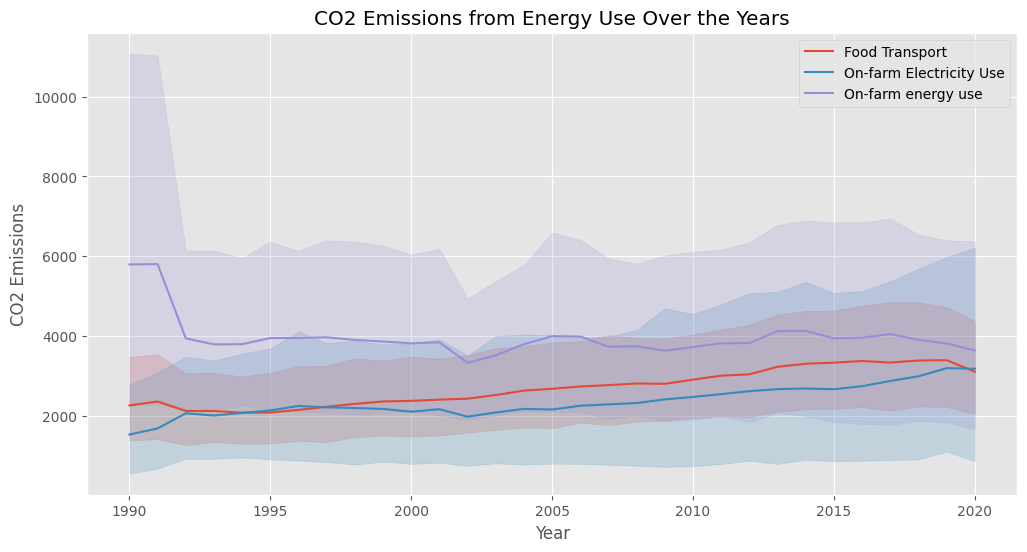

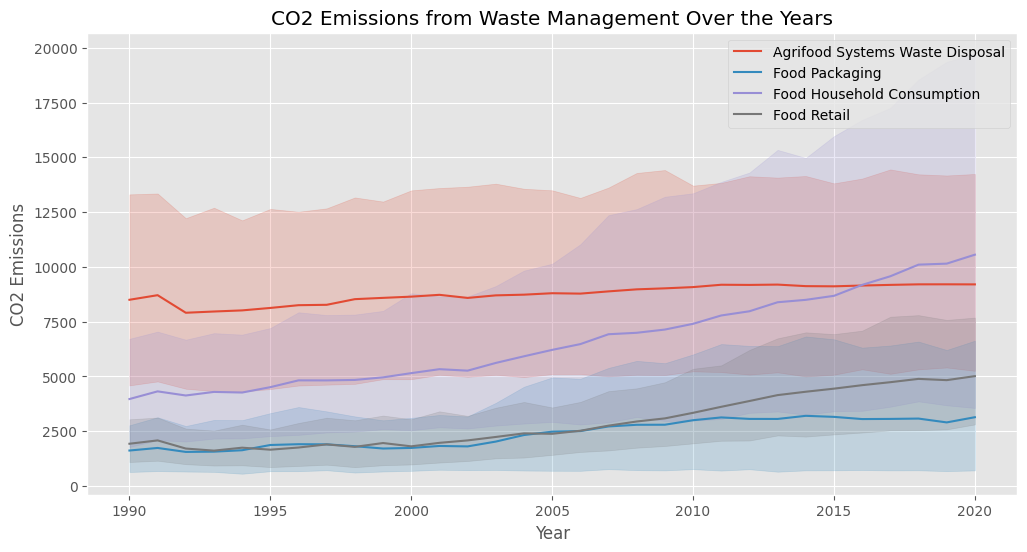

In [ ]:
# Define subcategories
agricultural_activities = ['Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
                           'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management']

industrial_processes = ['Pesticides Manufacturing', 'Fertilizers Manufacturing',
                        'Food Processing', 'IPPU']

land_use_forestry = ['Savanna fires', 'Forest fires', 'Forestland',
                     'Net Forest conversion', 'Fires in organic soils', 'Fires in humid tropical forests']

energy_use = ['Food Transport', 'On-farm Electricity Use', 'On-farm energy use']

waste_management = ['Agrifood Systems Waste Disposal', 'Food Packaging',
                    'Food Household Consumption', 'Food Retail']

# Create a dictionary for the subcategories
subcategories = {
    'Agricultural Activities': agricultural_activities,
    'Industrial Processes': industrial_processes,
    'Land Use and Forestry': land_use_forestry,
    'Energy Use': energy_use,
    'Waste Management': waste_management
}

# Visualizing CO2 Emissions by different subcategories
for category, features in subcategories.items():
    plt.figure(figsize=(12, 6))
    for feature in features:
        sns.lineplot(x='Year', y=feature, data=df, label=feature)
    plt.title(f'CO2 Emissions from {category} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.legend()
    plt.show()

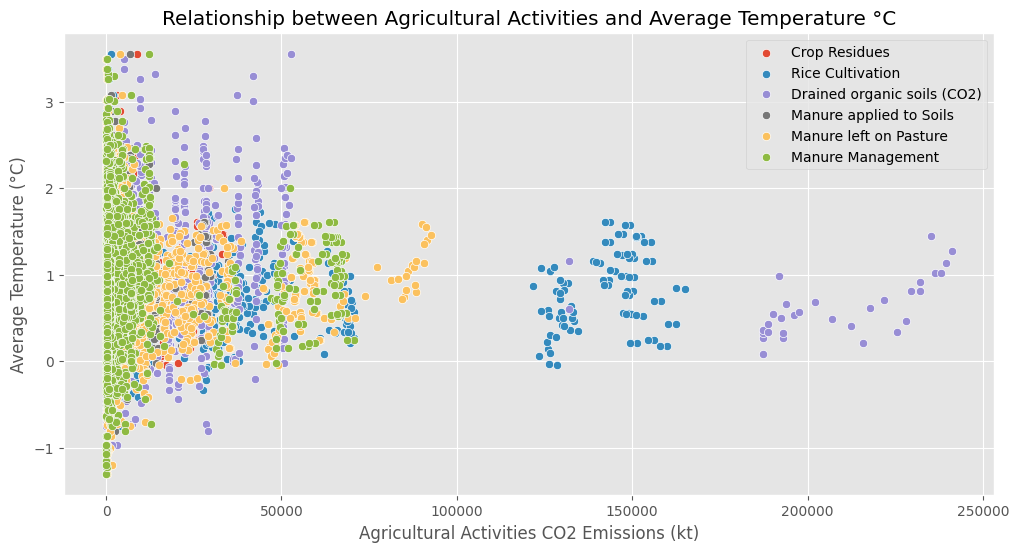

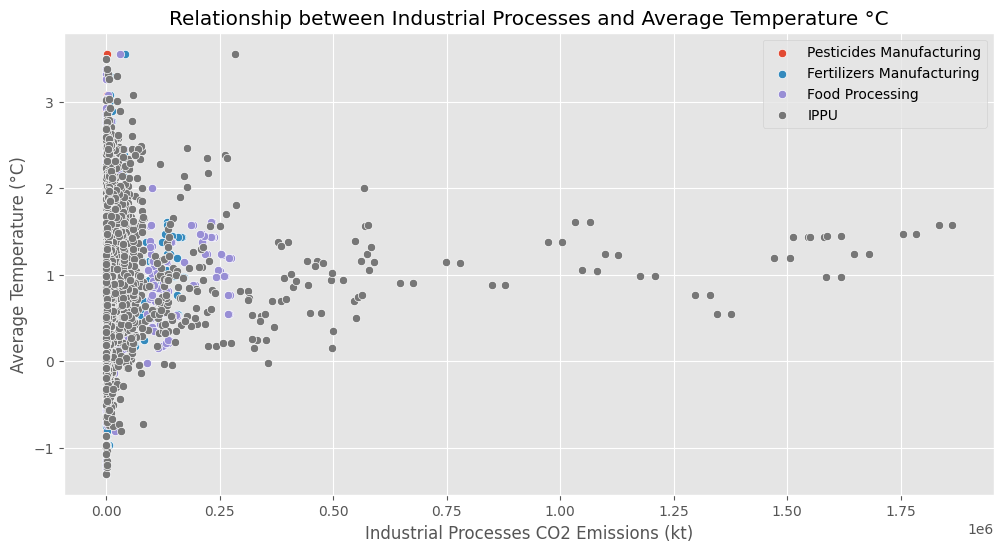

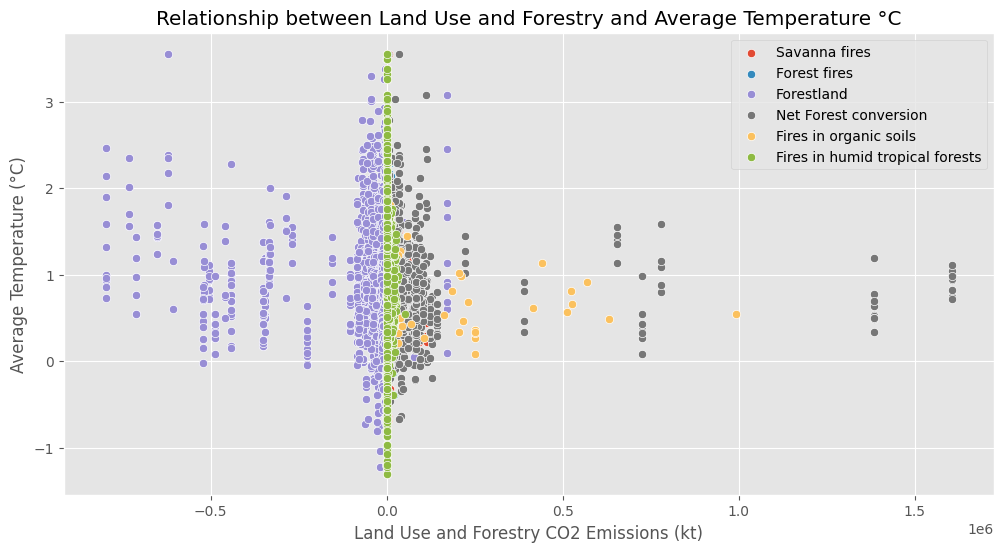

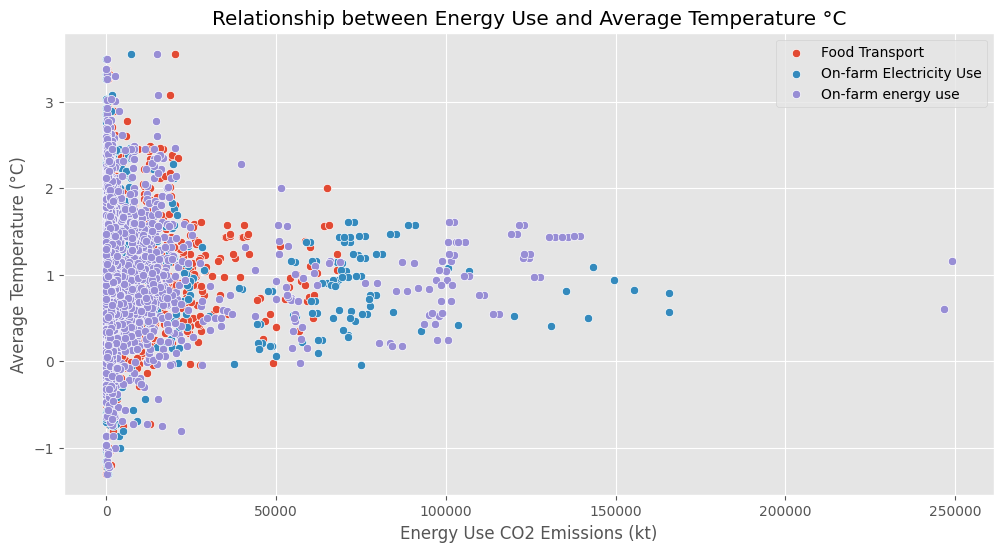

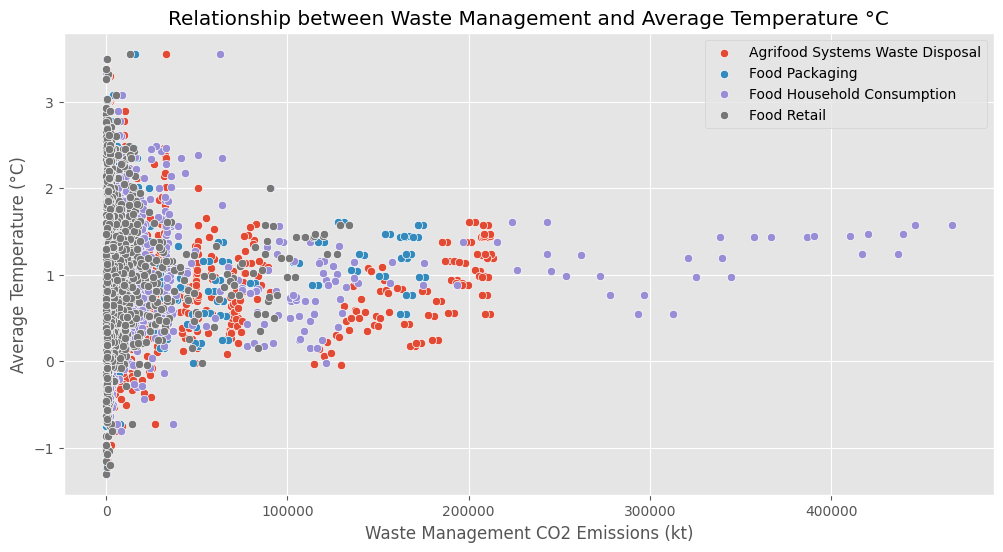

In [ ]:
# Visualizing the relationship between subcategories and Average Temperature °C
for category, features in subcategories.items():
    plt.figure(figsize=(12, 6))
    for feature in features:
        sns.scatterplot(x=feature, y='Average Temperature °C', data=df, label=feature)
    plt.title(f'Relationship between {category} and Average Temperature °C')
    plt.xlabel(f'{category} CO2 Emissions (kt)')
    plt.ylabel('Average Temperature (°C)')
    plt.legend()
    plt.show()

**FEATURE SELECTION USING ANOVA**

In [ ]:
# Select all the column of the dataframe except the last column
X = df.iloc[:,1:-1]
X

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
31,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,0.0000,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
32,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,0.0000,...,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
33,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,0.0000,...,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
34,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,0.0000,...,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
35,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,0.0000,...,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0000,75.0,251.1465,76500.2982,10662.4408,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0000,67.0,255.7975,76500.2982,10662.4408,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0000,66.0,327.0897,76500.2982,10662.4408,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0000,73.0,290.1893,76500.2982,10662.4408,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [ ]:
# Select all the rows of the dataframe
y = df.iloc[:,-1]
y

31       3295065.0
32       3302082.0
33       3303739.0
34       3300710.0
35       3293999.0
           ...    
6960    14452705.0
6961    14751102.0
6962    15052183.0
6963    15354607.0
6964    15669667.0
Name: Total_Population, Length: 4546, dtype: float64

In [ ]:
# Import libraries
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Select features using ANOVA
# Initialize SelectKBest
selector=SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]
# Print the selected features
print(selected_features)

Index(['Savanna fires', 'Forest fires', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption',
       'On-farm Electricity Use', 'Food Packaging', 'Food Processing',
       'Manure applied to Soils', 'Manure Management',
       'Fires in organic soils', 'Fires in humid tropical forests',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
X = df [['Year', 'Savanna fires', 'Crop Residues', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Food Household Consumption',
       'Food Retail', 'Food Packaging', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'Urban population',
       'total_emission']]

In [ ]:
# Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)

**MODEL BUILDING**

In [ ]:
# Performing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2-score: {r2}")
    print("-" * 36)

# Example dataset and train/test split
# X_train, X_test, y_train, y_test should be defined here
# X_train, X_test, y_train, y_test = ...

# Linear Regression
mr = LinearRegression()
evaluate_model(mr, X_train, y_train, X_test, y_test, "Linear Regression")

# Random Forest Regressor
rs = RandomForestRegressor()
evaluate_model(rs, X_train, y_train, X_test, y_test, "Random Forest Regressor")

# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
evaluate_model(gb, X_train, y_train, X_test, y_test, "Gradient Boosting Regressor")

# XGBoost Regressor
xgb = XGBRegressor()
evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost Regressor")

Linear Regression
MAE: 8050243.761218399
MSE: 191714563211285.88
RMSE: 13846102.816723768
R2-score: 0.9958698519930198
------------------------------------
Random Forest Regressor
MAE: 1124603.8960439556
MSE: 13727433153935.434
RMSE: 3705055.0810933206
R2-score: 0.9997042669595256
------------------------------------
Gradient Boosting Regressor
MAE: 2682834.936370119
MSE: 23703539036331.992
RMSE: 4868628.044565737
R2-score: 0.9994893495680796
------------------------------------
XGBoost Regressor
MAE: 1937949.4906810718
MSE: 64342708647927.03
RMSE: 8021390.692886554
R2-score: 0.9986138512096597
------------------------------------


Linear Regression
MAE: 8050243.761218399
MSE: 191714563211285.88
RMSE: 13846102.816723768
R2-score: 0.9958698519930198
------------------------------------


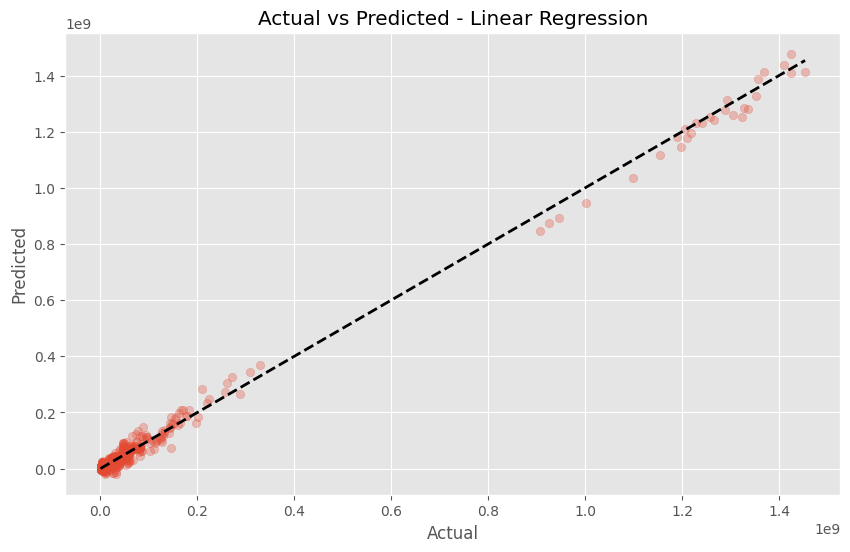

Random Forest Regressor
MAE: 1085712.6188791215
MSE: 11251501654314.549
RMSE: 3354325.812188576
R2-score: 0.9997576064835414
------------------------------------


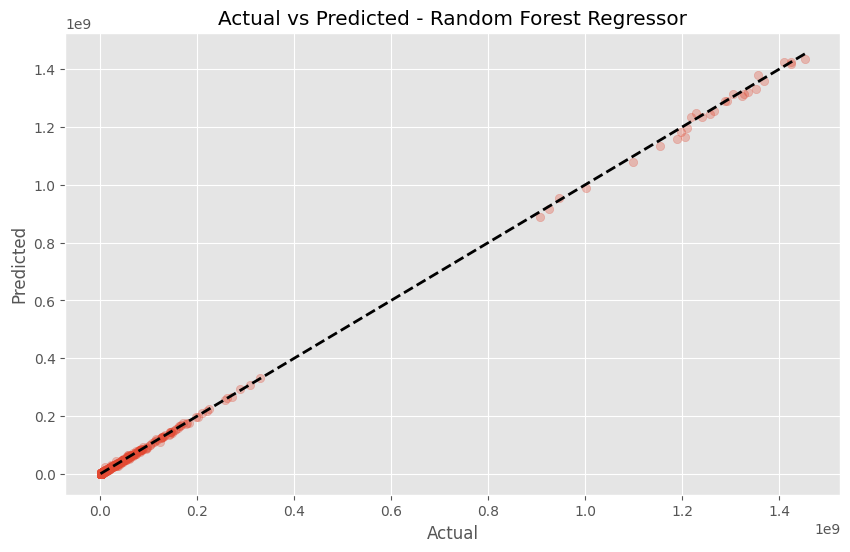

Gradient Boosting Regressor
MAE: 2723417.4048058554
MSE: 24921848760263.016
RMSE: 4992178.758844981
R2-score: 0.9994631032600584
------------------------------------


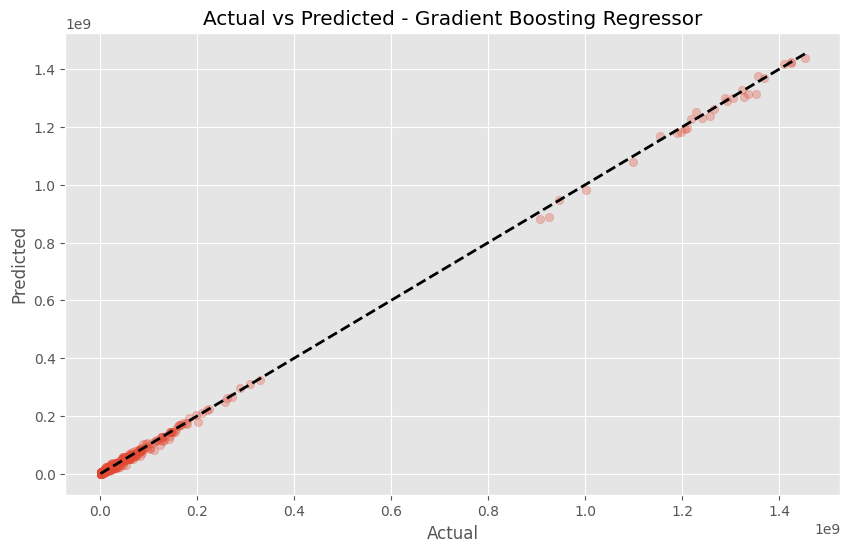

XGBoost Regressor
MAE: 1937949.4906810718
MSE: 64342708647927.03
RMSE: 8021390.692886554
R2-score: 0.9986138512096597
------------------------------------


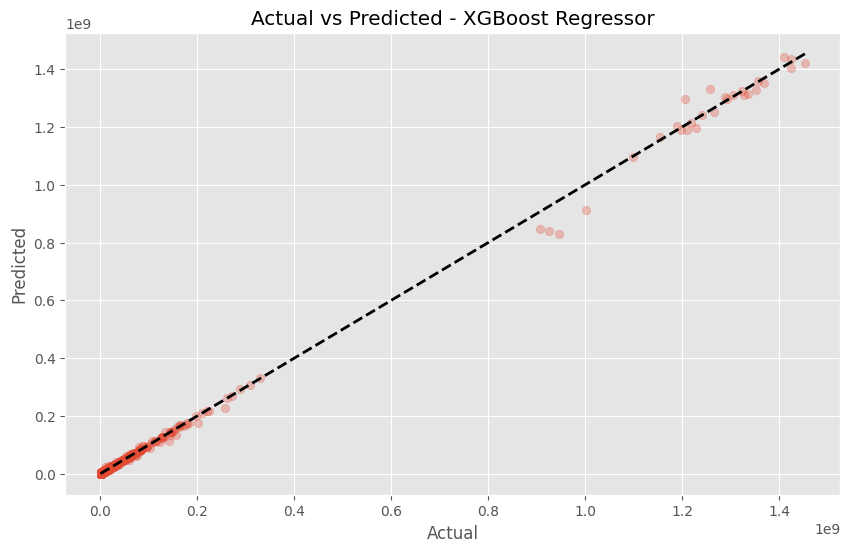

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2-score: {r2}")
    print("-" * 36)

    return y_pred

def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.show()

# Example dataset and train/test split
# X_train, X_test, y_train, y_test should be defined here
# X_train, X_test, y_train, y_test = ...

# Linear Regression
mr = LinearRegression()
y_pred_mr = evaluate_model(mr, X_train, y_train, X_test, y_test, "Linear Regression")
plot_predictions(y_test, y_pred_mr, "Linear Regression")

# Random Forest Regressor
rs = RandomForestRegressor()
y_pred_rs = evaluate_model(rs, X_train, y_train, X_test, y_test, "Random Forest Regressor")
plot_predictions(y_test, y_pred_rs, "Random Forest Regressor")

# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
y_pred_gb = evaluate_model(gb, X_train, y_train, X_test, y_test, "Gradient Boosting Regressor")
plot_predictions(y_test, y_pred_gb, "Gradient Boosting Regressor")

# XGBoost Regressor
xgb = XGBRegressor()
y_pred_xgb = evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost Regressor")
plot_predictions(y_test, y_pred_xgb, "XGBoost Regressor")
